# More on Python

In [1]:
%matplotlib inline

from IPython.display import display

## Search Path

### sys.path

When there's an `import`, Python tries to iterate over `sys.path` and look for the module specified within it. That's why it's common for programs add it's library path as the first entry in `sys.path`. 

Note: May mask built-in modules. It's a good practice to avoid name conflicts, and then you don't have to have the on the top of the list.

In [2]:
import sys
from os.path import dirname

if False:
    # Doesn't work in IPython Notebook :)
    sys.path.insert(0, dirname(__file__))

### Module Path

Check `sys.path` for your module path. Module managers such as `easy_install`, `pip` and `virtualenv` recognize those paths and handle that for you. 

## Better Ask for Forgiveness than Permission

In languages like C/PHP, it's very common to write codes like this:

```
// Pseudo code that resembles PHP

$fd = fopen($somepath);
if ($fd) {
    // Do something

    $csv_reader = csv.open($fd);
    
    if (is_resource($csv_reader)) {
        // read from the csv reader
    } else {
        // file opened, but probably not a csv
        // possibilities ? BOM for unicode files ? blah ...
    }
} else {
    // fopen failed
}
```

This procedural approach makes sense, but is way bogus and can consume your mind. That's why it's recommended to fire all the request in a `try ... catch` block, leave most function logic in a block, and handle those Exceptions in another.

```
# Pseudo code resembles Python

try:
    with open(somepath) as fp:
        csv_reader = csv.DictReader(fp)
        # read from it
except IOError:
    # Deal with IO exceptions
except csv.SomeException:
    # Bad format ?
finally:
    # Cleanup
```

## Exception Handling

In Python, we use `try ... catch ... finally ...` blocks to catch and handle exceptions. When an Exception is raised running the `try` part, Python will stop execution of that block and start to look for matching `catch` blocks, and runs code in the first matching block. No matter whether Exception was raised or catched, finally block will always be run before the uncaught Exception was raised to the outside (to the `try` block) world.

In [3]:
try:
    print("Enter Try block")
    raise IOError("Some IOError was raised")
    print("After Exception raised")
except (IOError, KeyError) as e:
    print(e)
except ValueError as e:
    print(e)
except Exception as e:
    # Catch-all, PEP-8 doesn't like it. May be necessary evil.
    print("Catch all %s" % e)
    pass
finally:
    print("Finally")

Enter Try block
Some IOError was raised
Finally


## Exception Objects

Exceptions in Python are objects, and they all inherit from `Exception` (and object). The exact hierachy (from Python Manual):

<pre>
BaseException
 +-- SystemExit
 +-- KeyboardInterrupt
 +-- GeneratorExit
 +-- Exception
      +-- StopIteration
      +-- StandardError
      |    +-- BufferError
      |    +-- ArithmeticError
      |    |    +-- FloatingPointError
      |    |    +-- OverflowError
      |    |    +-- ZeroDivisionError
      |    +-- AssertionError
      |    +-- AttributeError
      |    +-- EnvironmentError
      |    |    +-- IOError
      |    |    +-- OSError
      |    |         +-- WindowsError (Windows)
      |    |         +-- VMSError (VMS)
      |    +-- EOFError
      |    +-- ImportError
      |    +-- LookupError
      |    |    +-- IndexError
      |    |    +-- KeyError
      |    +-- MemoryError
      |    +-- NameError
      |    |    +-- UnboundLocalError
      |    +-- ReferenceError
      |    +-- RuntimeError
      |    |    +-- NotImplementedError
      |    +-- SyntaxError
      |    |    +-- IndentationError
      |    |         +-- TabError
      |    +-- SystemError
      |    +-- TypeError
      |    +-- ValueError
      |         +-- UnicodeError
      |              +-- UnicodeDecodeError
      |              +-- UnicodeEncodeError
      |              +-- UnicodeTranslateError
      +-- Warning
           +-- DeprecationWarning
           +-- PendingDeprecationWarning
           +-- RuntimeWarning
           +-- SyntaxWarning
           +-- UserWarning
           +-- FutureWarning
	       +-- ImportWarning
           +-- UnicodeWarning
           +-- BytesWarning
 </pre>

## More on Exception

Just like the other control blocks, try-catch can also be nested.

In [4]:
import sys
filename = "no_such_file"

try:
    try:
        fp = open("no_such_file")
    except IOError:
        print("Using stdin as alternative")
        fp = sys.stdin
    
    # blah ...
except Exception:
    # Catches other exceptions from here
    pass

Using stdin as alternative


## I/O Design (in, out, err)

Codes don't run alone. They rely on I/O pipe options to interact with the outer world. 

### Common Channels

Pipe
File
TTY (stdin, stdout, stderr)
Network

## Decorators

Decorators are the logical identity that with a @ before its name, occupy a line before your function. Python recognizes this syntax and modify your functions transparently, and that's why it's called **Decorators**.

```
@statement
def func():
    pass
```

Python will first evaluate `statement` (as a function), got result as `result`, and then assign `result(func)` to the symbol name `func`. 

In [5]:
def deco(func):
    print("deco called")
    print("__doc__ from func: %s" % func.__doc__)
    def wrapped(*args, **kwargs):
        print("wrapped called")
        result = func(*args, **kwargs)
        print("wrapped ends")
        
        return result
    
    return wrapped

In [6]:
def func(somevar):
    """
    Docstring to func
    """
    print("func called, somevar = `%s`" % somevar)

func('hello world')

func called, somevar = `hello world`


In [7]:
@deco
def func(somevar):
    """
    Docstring to func
    """
    print("func called, somevar = `%s`" % somevar)

func('hello world')

deco called
__doc__ from func: 
    Docstring to func
    
wrapped called
func called, somevar = `hello world`
wrapped ends


In [8]:
print(func.__doc__)

None


Oops, why is my \_\_doc\_\_ gone ??

In [9]:
import functools

def deco(func):
    print("deco called")
    print("__doc__ from func: %s" % func.__doc__)
    
    @functools.wraps(func)
    def wrapped(*args, **kwargs):
        print("wrapped called")
        result = func(*args, **kwargs)
        print("wrapped ends")
        
        return result
    
    return wrapped

@deco
def func(somevar):
    """
    Docstring to func
    """
    print("func called, somevar = `%s`" % somevar)

print(func.__doc__)

deco called
__doc__ from func: 
    Docstring to func
    

    Docstring to func
    


### Decorators with Arguments

If statement is a function call, Python will first evaluate it, and then invoke it's return value with func as its argument.

In [10]:
def deco_args(deco_arg):
    print("deco called, deco_arg = %s" % deco_arg)
    
    def wrapper(func):
        print("wrapper called, func = %s" % func)
        
        @functools.wraps(func)
        def wrapped(*args, **kwargs):
            return func(*args, **kwargs)
        return wrapped

    return wrapper

In [11]:
@deco_args("foo")
def func(somevar):
    """
    Docstring to func
    """
    print("func called, somevar = `%s`" % somevar)

func('hello world')

deco called, deco_arg = foo
wrapper called, func = <function func at 0x00000000081A6268>
func called, somevar = `hello world`


Note: decorators are also available as classes. Not covered in this lecture.

## Context

In modern laguages that has Garbage Collection (gc), freeing variables is no longer a pain (in most cases). However, resources remained expensive (descriptor and memory as buffer), that's why we wrap them in `context`.

In [12]:
# Sample usage
if False:
    with open("somefile") as fp:
        pass

Python will close `fp` automatically when leaving the `with` block, whether it's a success or exception.

In [13]:
class ContextExample(object):
    def __init__(self, sample_value):
        self.__sample_value = sample_value
        print("Init: (%s)" % sample_value)
    
    def __enter__(self):
        print("Enter")
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exit: (exc_type: %s, exc_value: %s, traceback: %s)" % (exc_type, exc_value, traceback))

In [14]:
with ContextExample('some value'):
    pass

Init: (some value)
Enter
Exit: (exc_type: None, exc_value: None, traceback: None)


In [15]:
try:
    print("Before Everything")
    with ContextExample('some value'):
        print("Start of With block")
        raise Exception("Foo")
        print("End of With block")
except:
    print("Except block")
    # Catch all so it don't break IPython

Before Everything
Init: (some value)
Enter
Start of With block
Exit: (exc_type: <class 'Exception'>, exc_value: Foo, traceback: <traceback object at 0x0000000006442148>)
Except block


# Pain Points

Python is in no way perfect. There are some common complaints around it.

## Performance - I/O

* Move to async I/O design
* GIL

Python natively promotes a procedural design, that runs in a single process. This makes initial development and debugging extremely simple, but also painful when you need a performance boost. 

Usually, refactoring the project in an I/O-loop based framework can help, in case the task is just I/O. Multi-threading can be the next intuitive approach, but it don't work pretty well in Python, partly because of the infamous GIL, Global Intepreter Lock. That means only a thread in a process can enter `run` state at a time. 

Some tried to remove GIL and make Python multi-thread friendly by introducing more fine-grained locks. The result ? Disaster. It runs slower than the vanilla Python.


## Performance - CPU

* Multiprocessing
* Modules implemented in C
* Cython

As an interpretative laugnage with weak types, Python is slow. Every variable has to be converted to `PyObject` behind the scene, and converted to other variable types (in Python) when passed to functions or operators. There are a few approaches to address this issue.

### Multi Processing

Dispatch jobs to processes instead of threads, so they can all run in the same time (on different cores) regardsless of GIL. However, centralized locks (normally implemented on the master process) may be required to synchronize processes.

Another issue is that it doesn't solve the data conversion issue, and each process will be inflicted by the GIL issue. Having lots of processes also has its overhead.

### Modules in C

C function calls (from Python, as module members) can get rid of GIL, and they usually take more efficient approaches for computation. That's why we would offload heavy computations to C-based modules (compared to native ones written in Python). The most famous example would be the `scipy`, `numpy`, and `matplotlib` triology.

# NumPy, SciPy, and MatplotLib

`NumPy` is a module written C that focus on mathematical computations. It defines array and matrix to hold elements of the same (native, C) type, and implements algorithm to compute against them efficiently. 

`SciPy` uses `NumPy` as its basis, and build higher-level mathematical as well as scientific formulae around it. 

`matplotlib` is less related to the others in the trilogy. It implements plotting interface very similar to that in matlab.

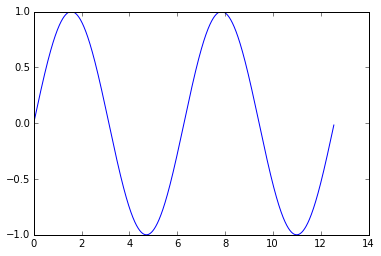

In [16]:
import matplotlib
import math
from matplotlib.pyplot import plot

x = [ i / 100.0 for i in range(0, int(4 *math.pi * 100)) ]
y = [ math.sin(i) for i in x ]

display(plot(x, y))


# Cython

Cython hooks to Python API and source code used to compile C-based Python modules, and offers another set of API that we can import from Cython modules as if they were Python modules. As long as pre-requisites were met, syntax checks, compilation, and linking are taken care of behind the scene.

Cython is beyond the scope of our Python class, so I'll just give a high-level view on how we can improve (Python) code performce with it.

## Compilation (Do Nothing)

Python is a interpretative language, and it's difficult to apply static optimizations runtime. Cython will interpret your code (module) in C and compile it, so these optimizations would be immediately available. And the tradeoff is a few seconds of delay compiling from source if the compiled binary is out of date.

## Type Hint

The first approach converting a Python project to Cython would be providing type hints. Cython would be able to convert them to native (C) variables rather than `PyObject`, which uses less memory and is more performant.

Codes should run ~10x faster compared to the original .py by achieving this step.

## Rewrite in C

For tougher scenario (usually ML with Big Data), we would profile and rewrite core components in C to boost its performance. Common use cases are:

* Specific data structure and algorithm
* Prevent frequent boxing / unboxing